<a href="https://colab.research.google.com/github/RRSSsantosh-cse/FSM_IITD-AIA_ML/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

drive is imported from google.colab such that there could be access of files in drive with the help of mount 



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

As per question Species has to be removed and stored in species list

dataset which consists of strings are converted into numbers with the help of values 

random.choice(a, size=None, replace=True, p=None)
Generates a random sample from a given 1-D array
in which,
range(data.shape[0])" creates a sequence of numbers from 0 to the number of rows in the "data" array. This is equivalent to the indices of the rows in the array.

"size=k" specifies the number of elements to be chosen randomly from the sequence, which is "k" in this case.

"replace=False" ensures that the selected elements are unique and not replaced. Each chosen element will be different from the others.


for _ in range(max_iterations): This loop iterates a maximum number of times specified by max_iterations. The underscore _ is typically used as a placeholder when the loop variable is not needed.

distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2) calculates the Euclidean distances between each data point and the centroids. data is a 2D array representing the dataset, and centroids is an array containing the current centroids. [:, np.newaxis] is used to reshape the data array to have an additional axis, allowing broadcasting to compute element-wise differences. The resulting distances array will have the shape (num_data_points, k), where num_data_points is the number of data points and k is the number of centroids.

labels = np.argmin(distances, axis=1) assigns each data point to the nearest centroid by finding the index of the centroid with the minimum distance. The resulting labels array will have the shape (num_data_points,), where each element represents the label or cluster assignment of the corresponding data point.

new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)]) updates the centroids by calculating the mean of the data points assigned to each centroid. It uses a list comprehension to iterate over each cluster label i, filters the data points that belong to that cluster, and calculates their mean along the axis 0. The resulting new_centroids array will have the shape (k, num_features), where k is the number of centroids and num_features is the number of features in the data.

if np.allclose(centroids, new_centroids): break checks if the centroids have converged, i.e., if the new centroids are very close to the previous centroids. np.allclose() compares the element-wise proximity of the two arrays, and if they are sufficiently close, the loop is terminated using break.

centroids = new_centroids updates the current centroids with the new centroids obtained in the previous step.

The loop continues until the maximum number of iterations is reached or the centroids have converged. Once the loop terminates, the final labels array, representing the cluster assignments for each data point, is returned along with the species array.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def kmeans_clustering(dataset, k, max_iterations=100):
    # Remove the "Species" column
    species = dataset['Species']
    dataset = dataset.drop('Species', axis=1)
    
    # Convert dataset to NumPy array
    data = dataset.values
    
    # Initialize centroids randomly
    np.random.seed(42)
    centroids = data[np.random.choice(range(data.shape[0]), size=k, replace=False)]
    
    for _ in range(max_iterations):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Update the centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        # Check if the centroids have converged
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, species

Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data points much easier and faster for machine learning algorithms without extraneous variables to process.


species = dataset['Species'] extracts the "Species" column from the dataset and assigns it to the variable species.

dataset = dataset.drop('Species', axis=1) removes the "Species" column from the dataset using the drop method along the column axis (axis=1). The modified dataset is assigned back to the variable dataset.

data = dataset.values converts the modified dataset into a NumPy array by accessing its underlying values. The resulting array is assigned to the variable data.

(data - data.mean(axis=0)) / data.std(axis=0) standardizes the data by subtracting the mean of each feature (column) and dividing by the standard deviation of each feature. This step ensures that all features have zero mean and unit variance.

cov_matrix = np.cov(data.T) computes the covariance matrix of the standardized data. The np.cov function calculates the pairwise covariances between the columns of the transposed data array (data.T), resulting in a covariance matrix.

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) computes the eigenvalues and eigenvectors of the covariance matrix using np.linalg.eig. The eigenvalues variable will contain the eigenvalues, and the eigenvectors variable will contain the corresponding eigenvectors.

sorted_indices = np.argsort(eigenvalues)[::-1] sorts the eigenvalues in descending order and returns the indices that would sort the array. The [::-1] indexing is used to reverse the order, so the indices are sorted in descending order.

eigenvalues = eigenvalues[sorted_indices] sorts the eigenvalues using the sorted indices, ensuring that they are now in descending order.

eigenvectors = eigenvectors[:, sorted_indices] sorts the eigenvectors using the sorted indices, so they correspond to the sorted eigenvalues.

transformed_data = data.dot(eigenvectors) transforms the standardized data into a new coordinate system defined by the eigenvectors. This transformation is achieved by matrix multiplication (dot) of the standardized data (data) with the eigenvectors (eigenvectors).

return transformed_data[:, :3], eigenvalues, species returns the transformed data, containing only the first three principal components (transformed_data[:, :3]), the eigenvalues (eigenvalues), and the original "Species" column (species).


In [3]:
def principal_component_analysis(dataset):
    # Remove the "Species" column
    species = dataset['Species']
    dataset = dataset.drop('Species', axis=1)
    
    # Convert dataset to NumPy array
    data = dataset.values
    
    # Standardize the data
    data = (data - data.mean(axis=0)) / data.std(axis=0)
    
    # Compute the covariance matrix
    cov_matrix = np.cov(data.T)
    
    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Transform the data to the new coordinate system
    transformed_data = data.dot(eigenvectors)
    
    return transformed_data[:, :3], eigenvalues, species

path='/content/drive/MyDrive/Machine_Learning/Iris.csv' sets the path to the Iris dataset file.

iris_df = pd.read_csv(path) reads the CSV file using Pandas and loads the dataset into a DataFrame called iris_df.

k = 3 sets the number of clusters for K-means clustering.

cluster_labels, actual_species = kmeans_clustering(iris_df, k) applies the kmeans_clustering function to the iris_df DataFrame with k clusters. It returns the cluster labels assigned to each data point and the actual species of the Iris flowers.

plt.scatter(iris_df['SepalLengthCm'], iris_df['SepalWidthCm'], c=cluster_labels) creates a scatter plot of the Iris dataset. The x-axis represents the 'SepalLengthCm' feature, the y-axis represents the 'SepalWidthCm' feature, and the points are colored based on the assigned cluster labels.

plt.xlabel('Sepal Length (cm)'), plt.ylabel('Sepal Width (cm)'), and plt.title('K-Means Clustering - Cluster Output') set the x-axis label, y-axis label, and title for the cluster output plot, respectively.

plt.show() displays the cluster output plot.

plt.scatter(iris_df['SepalLengthCm'], iris_df['SepalWidthCm']) creates a scatter plot of the Iris dataset without coloring the points, representing the actual species of the Iris flowers.

plt.xlabel('Sepal Length (cm)'), plt.ylabel('Sepal Width (cm)'), and plt.title('Actual Species') set the x-axis label, y-axis label, and title for the actual species plot, respectively.

plt.show() displays the actual species plot.

transformed_data, eigenvalues, _ = principal_component_analysis(iris_df) applies PCA to the Iris dataset using the principal_component_analysis function. It returns the transformed data, the eigenvalues, and ignores the species column.

fig = plt.figure(), ax = fig.add_subplot(111, projection='3d') create a 3D plot for visualizing the first three principal components.

ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2]) plots the first three principal components on the x, y, and z axes, respectively.

ax.set_xlabel('PC1'), ax.set_ylabel('PC2'), ax.set_zlabel('PC3'), and ax.set_title('PCA - First Three Eigenvectors') set the labels and title for the 3D plot.

print("Eigenvalues:", eigenvalues[:3]) prints the first three eigenvalues of the PCA.


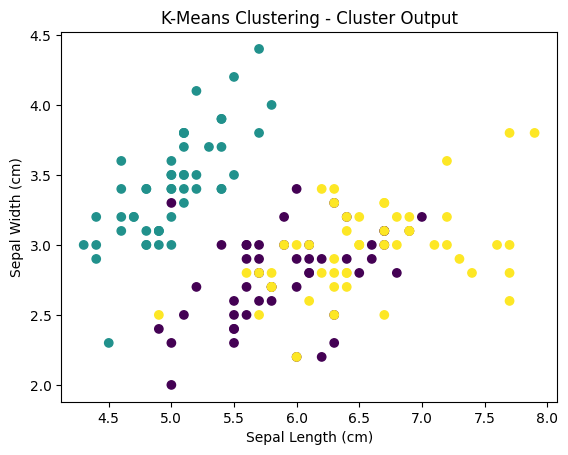

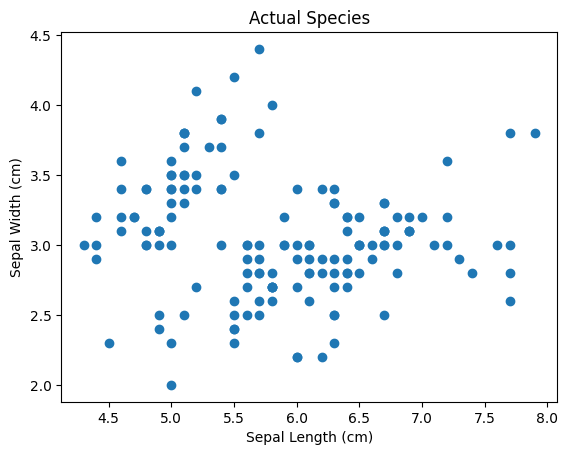

Eigenvalues: [3.7603354  0.92794917 0.23570257]


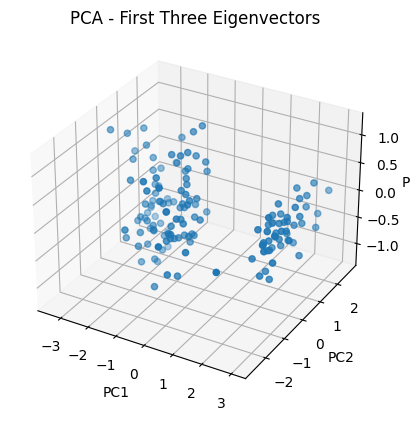

In [4]:

# Load the iris dataset using Pandas
path='/content/drive/MyDrive/Machine_Learning/Iris.csv'
iris_df = pd.read_csv(path)

# Apply K-Means Clustering
k = 3  # Number of clusters
cluster_labels, actual_species = kmeans_clustering(iris_df, k)

# Visualize the cluster output
plt.scatter(iris_df['SepalLengthCm'], iris_df['SepalWidthCm'], c=cluster_labels)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering - Cluster Output')
plt.show()

# Visualize the actual species
plt.scatter(iris_df['SepalLengthCm'], iris_df['SepalWidthCm'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Actual Species')
plt.show()

# Apply Principal Component Analysis
transformed_data, eigenvalues, _ = principal_component_analysis(iris_df)

# Plot the first three eigenvectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA - First Three Eigenvectors')

# Print the eigenvalues
print("Eigenvalues:", eigenvalues[:3])